In [79]:
#import lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
#load dataset
plant1 = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/plant1_merged.csv")
plant2 = pd.read_csv("/content/drive/MyDrive/Projects/Project Hire/1. Solar Project/Solar Power Generation Data/plant2_merged.csv")

In [81]:
datasets = {
    "Plant 1 Dataset":plant1,
    "Plant 2 Dataset":plant2
}

In [82]:
for name,df in datasets.items():
  print(f"\n{name}")
  display(df.head(2))
  display(df.dtypes)
  display(df.isnull().sum())


Plant 1 Dataset


,DATE_TIME,MONTH,DAY,HOUR,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,5,15,0,4135001,1BY6WEcLGh8j5v7,25.184316,22.857507,0.0,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,5,15,0,4135001,1IF53ai7Xc0U56Y,25.184316,22.857507,0.0,0.0,0.0,0.0,6183645.0


,0
DATE_TIME,object
MONTH,int64
DAY,int64
HOUR,int64
PLANT_ID_x,int64
SOURCE_KEY_x,object
AMBIENT_TEMPERATURE,float64
MODULE_TEMPERATURE,float64
IRRADIATION,float64
DC_POWER,float64


,0
DATE_TIME,0
MONTH,0
DAY,0
HOUR,0
PLANT_ID_x,0
SOURCE_KEY_x,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DC_POWER,0



Plant 2 Dataset


,DATE_TIME,MONTH,DAY,HOUR,PLANT_ID_x,SOURCE_KEY_x,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,5,15,0,4136001,4UPUqMRk7TRMgml,27.004764,25.060789,0.0,0.0,0.0,9425.0,2.429011e+06
1,2020-05-15 00:00:00,5,15,0,4136001,81aHJ1q11NBPMrL,27.004764,25.060789,0.0,0.0,0.0,0.0,1.215279e+09


,0
DATE_TIME,object
MONTH,int64
DAY,int64
HOUR,int64
PLANT_ID_x,int64
SOURCE_KEY_x,object
AMBIENT_TEMPERATURE,float64
MODULE_TEMPERATURE,float64
IRRADIATION,float64
DC_POWER,float64


,0
DATE_TIME,0
MONTH,0
DAY,0
HOUR,0
PLANT_ID_x,0
SOURCE_KEY_x,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DC_POWER,0


In [83]:
#convert data type of date time column
for name,df in datasets.items():
  print(f"\n{name}")
  df['DATE_TIME']=pd.to_datetime(df['DATE_TIME'], errors='coerce')
  if df['DATE_TIME'].dtypes == 'object':
    print("Data Type Not Converted")
  else:
    print("Data Type Converted from object to date_time")



Plant 1 Dataset
Data Type Converted from object to date_time

Plant 2 Dataset
Data Type Converted from object to date_time


In [84]:
#check if there are any naT values in date time column
for name,df in datasets.items():
  if df['DATE_TIME'].isna().sum() > 0:
    print(f"{name} ""Invalid Date Values")
  else:
    print(f"{name} ""No Invalid Data Values")

Plant 1 Dataset No Invalid Data Values
Plant 2 Dataset No Invalid Data Values



Plant 1 Dataset
Daily Pearson r: 0.993


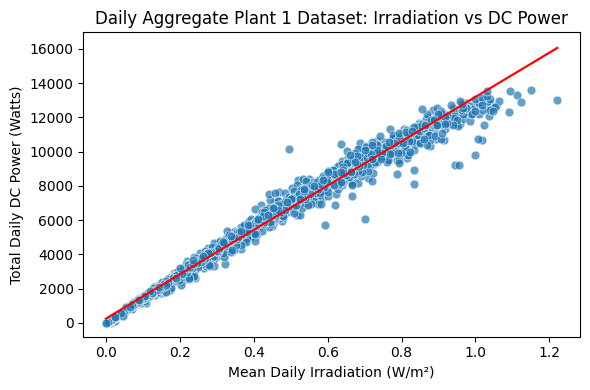


Plant 2 Dataset
Daily Pearson r: 0.871


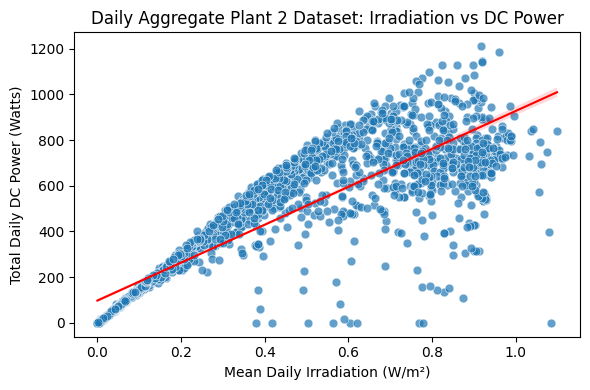

In [85]:
#correlation between irradiation and DC power
for name,df in datasets.items():
  print(f"\n{name}")
  # daily aggregation
  daily = (
    df[df['IRRADIATION'] > 0]
    .groupby(df['DATE_TIME'])
    .agg({'IRRADIATION': 'mean', 'DC_POWER': 'mean'})
    .reset_index()
)


  # compute correlation
  print("Daily Pearson r:", round(daily['IRRADIATION'].corr(daily['DC_POWER']), 3))
  # plot with twin y-axis (irradiation on left, power on right)
  plt.figure(figsize=(6,4))
  sns.scatterplot(x='IRRADIATION', y='DC_POWER', data=daily, s=40, alpha=0.7)
  sns.regplot(x='IRRADIATION', y='DC_POWER', data=daily, scatter=False, color='red', line_kws={'lw':1.5})
  plt.title(f"Daily Aggregate {name}: Irradiation vs DC Power")
  plt.xlabel('Mean Daily Irradiation (W/m²)')
  plt.ylabel('Total Daily DC Power (Watts)')
  plt.tight_layout()
  plt.show()



Plant 1 Dataset


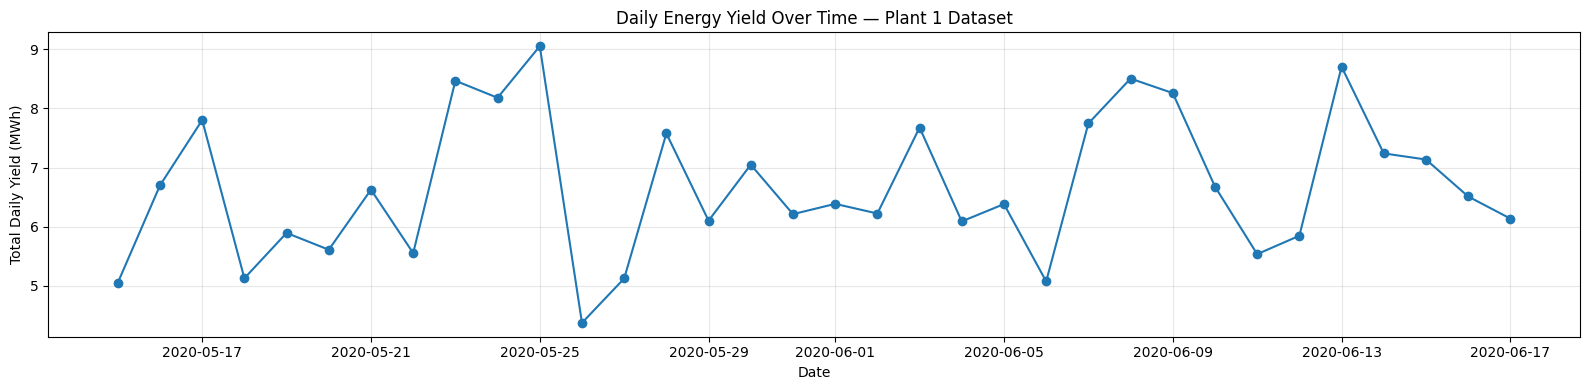


Plant 2 Dataset


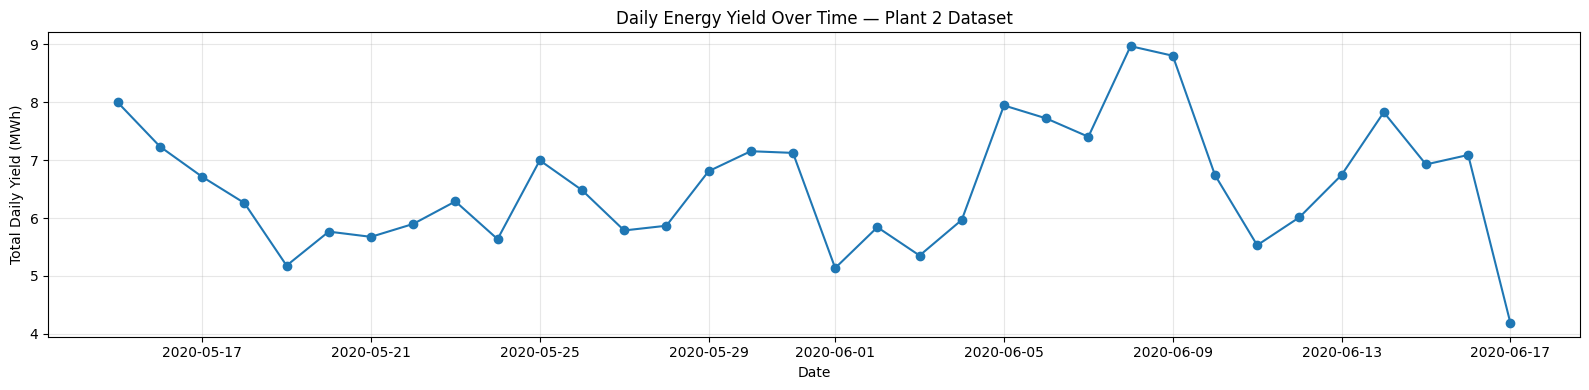

In [86]:
#Daily Yield Over Time
for name, df in datasets.items():
    print(f"\n{name}")

    # Aggregate by date (remove time)
    daily_yield = (
        df.groupby(df['DATE_TIME'].dt.date)
          .agg({'DAILY_YIELD': 'sum'})
          .reset_index()
          .rename(columns={'DATE_TIME': 'DATE'})
    )

    # Convert to MWh for clarity
    daily_yield['DAILY_YIELD_MWh'] = daily_yield['DAILY_YIELD'] / 1e6

    # Plot the trend
    plt.figure(figsize=(16, 4))
    plt.plot(daily_yield['DATE'], daily_yield['DAILY_YIELD_MWh'], marker='o', linewidth=1.5)
    plt.title(f"Daily Energy Yield Over Time — {name}")
    plt.xlabel("Date")
    plt.ylabel("Total Daily Yield (MWh)")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


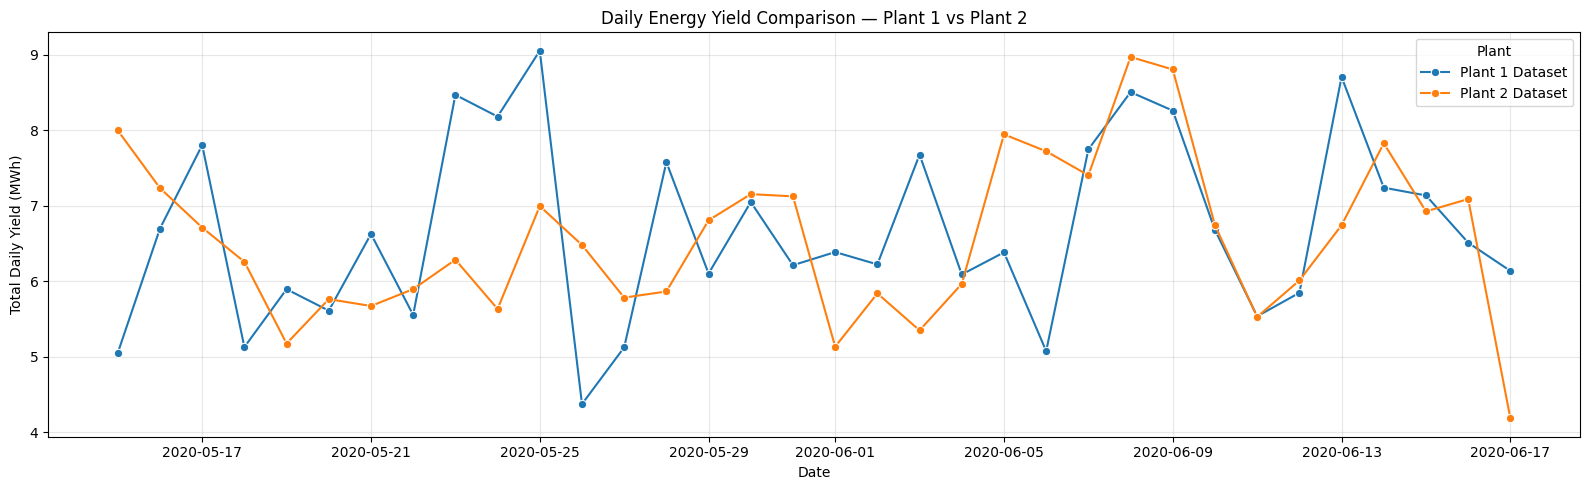

In [87]:
#comparing Plant 1 vs Plant 2 total generation
comparison = []

for name, df in datasets.items():
    daily = (
        df.groupby(df['DATE_TIME'].dt.date)
          .agg({'DAILY_YIELD': 'sum'})
          .reset_index()
    )
    daily['DAILY_YIELD_MWh'] = daily['DAILY_YIELD'] / 1e6
    daily['Plant'] = name
    comparison.append(daily)

# Combine both into one DataFrame
combined = pd.concat(comparison)

# Plot comparison
plt.figure(figsize=(16, 5))
sns.lineplot(data=combined, x='DATE_TIME', y='DAILY_YIELD_MWh', hue='Plant', marker='o')
plt.title("Daily Energy Yield Comparison — Plant 1 vs Plant 2")
plt.xlabel("Date")
plt.ylabel("Total Daily Yield (MWh)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Plant 1 Dataset


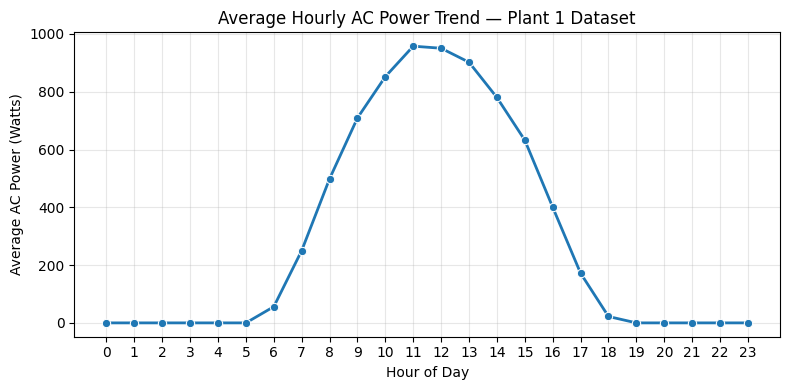


Plant 2 Dataset


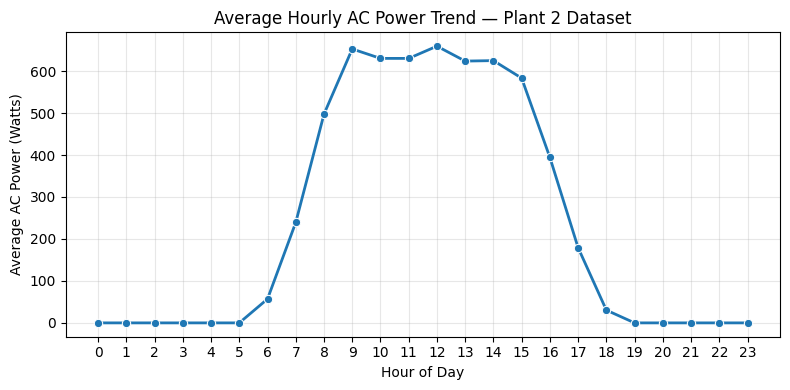

"\nThe output needs to be understood as -  Plant 1 here has an AC Power output of around 800-850 Watts in Peak hours between say 11 am to 1 pm. Now this is with respect to each inverter.\nThat means whatever number of inverters are there in that plant, each gives an AC output of 800-850 Watts on average , peak hour time daily.\nLet's say we have 20 inverters in each plant then 20*800 Watts , that is Plant 1 average around 16,000 Watts or 16KW, that is plant 1 average AC production in peak hour.\n"

In [88]:
#hourly trend in generation to check the peak hours of AC power output


for name, df in datasets.items():
    print(f"\n{name}")

    # Average AC power per hour across entire dataset
    hourly_power = (
          df.groupby(df[('HOUR')])
          .agg({'AC_POWER':'mean'})
          .reset_index()
    )


    # Plot hourly trend
    plt.figure(figsize=(8,4))
    sns.lineplot(data=hourly_power, x='HOUR', y='AC_POWER', marker='o', linewidth=2)
    plt.title(f"Average Hourly AC Power Trend — {name}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average AC Power (Watts)")
    plt.xticks(range(0, 24))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

"""
The output needs to be understood as -  Plant 1 here has an AC Power output of around 800-850 Watts in Peak hours between say 11 am to 1 pm. Now this is with respect to each inverter.
That means whatever number of inverters are there in that plant, each gives an AC output of 800-850 Watts on average , peak hour time daily.
Let's say we have 20 inverters in each plant then 20*800 Watts , that is Plant 1 average around 16,000 Watts or 16KW, that is plant 1 average AC production in peak hour.
"""



In [89]:
#inverter conversion ratio check from DC power to AC power
for name, df in datasets.items():
    print(f"\n{name}")

    df['DC_ENERGY_MW'] = df['DC_POWER']*(15/60) / 1e6
    df['AC_ENERGY_MW'] = df['AC_POWER']*(15/60) / 1e6

    # Group by inverter and sum total DC & AC power
    inverter_summary = (
        df.groupby('SOURCE_KEY_x')
          .agg({'DC_ENERGY_MW': 'sum', 'AC_ENERGY_MW': 'sum'})
          .reset_index()
    )

    # Conversion ratio (AC/DC)
    inverter_summary['CONVERSION_RATIO %'] = (inverter_summary['AC_ENERGY_MW'] / inverter_summary['DC_ENERGY_MW']) * 100

    # Display table
    display(round(inverter_summary.sort_values('CONVERSION_RATIO %', ascending=False),2).head(5))

"""
Here, we derived energy from the power -> as we know that energy = power x time.
We know that our recordings are 15 min time interval -> so that is 1/4th of 60 minutes. -> every recording is 1/4th of an hour.
therefore for each record the energy E = P x (15/60) or E = P x 0.25
Then we devide by 1e6 because we are converting our Energy which is in Wh to MWh.
"""



Plant 1 Dataset


,SOURCE_KEY_x,DC_ENERGY_MW,AC_ENERGY_MW,CONVERSION_RATIO %
11,bvBOhCH3iADSZry,2.23,0.22,9.78
0,1BY6WEcLGh8j5v7,2.27,0.22,9.78
16,sjndEbLyjtCKgGv,2.46,0.24,9.78
13,ih0vzX44oOqAx2f,2.42,0.24,9.78
20,zBIq5rxdHJRwDNY,2.46,0.24,9.78



Plant 2 Dataset


,SOURCE_KEY_x,DC_ENERGY_MW,AC_ENERGY_MW,CONVERSION_RATIO %
11,Quc1TzYxW2pYoWX,0.14,0.14,97.92
3,Et9kgGMDl729KT4,0.15,0.15,97.87
5,LYwnQax7tkwH5Cb,0.16,0.16,97.86
18,rrq4fwE8jgrTyWY,0.17,0.17,97.85
17,q49J1IKaHRwDQnt,0.18,0.18,97.83


'\nHere, we derived energy from the power -> as we know that energy = power x time. \nWe know that our recordings are 15 min time interval -> so that is 1/4th of 60 minutes. -> every recording is 1/4th of an hour. \ntherefore for each record the energy E = P x (15/60) or E = P x 0.25\nThen we devide by 1e6 because we are converting our Energy which is in Wh to MWh. \n'

In [90]:
#diagnosis and possible reason for such low conversion rate for plant 1
"""
It is very rare that in reality we can have such major difference , inverters working at 9% efficiency are considered failure.
We will look at the statistical data again..
"""
for name, df in datasets.items():
    print(f"\n=== {name} ===")

    # Basic diagnostics to spot unit/scale issues
    print("Rows:", len(df))
    print("Distinct inverters (SOURCE_KEY_x):", df['SOURCE_KEY_x'].nunique())
    print("DC_POWER range:", df['DC_POWER'].describe().round(2).to_dict())
    print("AC_POWER range:", df['AC_POWER'].describe().round(2).to_dict())

"""
Look at the Plant 1 DC Power Range and AC Power Range.
Looking at it , it looks like a possibility that the DC power range is in Watts and the AC power is in KW alrady.
Wheras for the Plant 2, the DC and AC both seem to be in KW units.

"""


=== Plant 1 Dataset ===
Rows: 68778
Distinct inverters (SOURCE_KEY_x): 22
DC_POWER range: {'count': 68778.0, 'mean': 3147.43, 'std': 4036.46, 'min': 0.0, '25%': 0.0, '50%': 429.0, '75%': 6366.96, 'max': 14471.12}
AC_POWER range: {'count': 68778.0, 'mean': 307.8, 'std': 394.4, 'min': 0.0, '25%': 0.0, '50%': 41.49, '75%': 623.62, 'max': 1410.95}

=== Plant 2 Dataset ===
Rows: 67698
Distinct inverters (SOURCE_KEY_x): 22
DC_POWER range: {'count': 67698.0, 'mean': 246.7, 'std': 370.57, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 446.59, 'max': 1420.93}
AC_POWER range: {'count': 67698.0, 'mean': 241.28, 'std': 362.11, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 438.22, 'max': 1385.42}


'\nLook at the Plant 1 DC Power Range and AC Power Range. \nLooking at it , it looks like a possibility that the DC power range is in Watts and the AC power is in KW alrady. \nWheras for the Plant 2, the DC and AC both seem to be in KW units. \n\n'

In [91]:
#converting DC power for plant 1
for name, df in datasets.items():
    if "Plant 1" in name:
        df['DC_POWER'] = df['DC_POWER'] / 10

        print(f"{name}: Converted from W → kW for both DC")
    else:
        print(f"{name}: Already in kW (no change)")

Plant 1 Dataset: Converted from W → kW for both DC
Plant 2 Dataset: Already in kW (no change)


In [92]:
#Check the paramters again

for name, df in datasets.items():
    print(f"\n=== {name} ===")

    # Basic diagnostics to spot unit/scale issues
    print("Rows:", len(df))
    print("Distinct inverters (SOURCE_KEY_x):", df['SOURCE_KEY_x'].nunique())
    print("DC_POWER range:", df['DC_POWER'].describe().round(2).to_dict())
    print("AC_POWER range:", df['AC_POWER'].describe().round(2).to_dict())


=== Plant 1 Dataset ===
Rows: 68778
Distinct inverters (SOURCE_KEY_x): 22
DC_POWER range: {'count': 68778.0, 'mean': 314.74, 'std': 403.65, 'min': 0.0, '25%': 0.0, '50%': 42.9, '75%': 636.7, 'max': 1447.11}
AC_POWER range: {'count': 68778.0, 'mean': 307.8, 'std': 394.4, 'min': 0.0, '25%': 0.0, '50%': 41.49, '75%': 623.62, 'max': 1410.95}

=== Plant 2 Dataset ===
Rows: 67698
Distinct inverters (SOURCE_KEY_x): 22
DC_POWER range: {'count': 67698.0, 'mean': 246.7, 'std': 370.57, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 446.59, 'max': 1420.93}
AC_POWER range: {'count': 67698.0, 'mean': 241.28, 'std': 362.11, 'min': 0.0, '25%': 0.0, '50%': 0.0, '75%': 438.22, 'max': 1385.42}


In [93]:
#inverter conversion ratio check from DC power to AC power
for name, df in datasets.items():
    print(f"\n{name}")

    df['DC_ENERGY_MW'] = df['DC_POWER']*(15/60) / 1e6
    df['AC_ENERGY_MW'] = df['AC_POWER']*(15/60) / 1e6

    # Group by inverter and sum total DC & AC power
    inverter_summary = (
        df.groupby('SOURCE_KEY_x')
          .agg({'DC_ENERGY_MW': 'sum', 'AC_ENERGY_MW': 'sum'})
          .reset_index()
    )

    # Conversion ratio (AC/DC)
    inverter_summary['CONVERSION_RATIO %'] = (inverter_summary['AC_ENERGY_MW'] / inverter_summary['DC_ENERGY_MW']) * 100

    # Display table
    display(round(inverter_summary.sort_values('CONVERSION_RATIO %', ascending=False),2).head(5))



Plant 1 Dataset


,SOURCE_KEY_x,DC_ENERGY_MW,AC_ENERGY_MW,CONVERSION_RATIO %
11,bvBOhCH3iADSZry,0.22,0.22,97.84
0,1BY6WEcLGh8j5v7,0.23,0.22,97.83
16,sjndEbLyjtCKgGv,0.25,0.24,97.80
13,ih0vzX44oOqAx2f,0.24,0.24,97.80
20,zBIq5rxdHJRwDNY,0.25,0.24,97.80



Plant 2 Dataset


,SOURCE_KEY_x,DC_ENERGY_MW,AC_ENERGY_MW,CONVERSION_RATIO %
11,Quc1TzYxW2pYoWX,0.14,0.14,97.92
3,Et9kgGMDl729KT4,0.15,0.15,97.87
5,LYwnQax7tkwH5Cb,0.16,0.16,97.86
18,rrq4fwE8jgrTyWY,0.17,0.17,97.85
17,q49J1IKaHRwDQnt,0.18,0.18,97.83
